# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [32]:
import math
import sys

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model
import seaborn as sns


## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [34]:
# YOUR CODE HERE
url = 'https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/560_bodyfat/560_bodyfat.tsv.gz'
df = pd.read_csv(url, sep='\t')

This is a body fat prediction dataset from UC Irvine listing the body circumference measurements for 252 men. 

In [35]:
df.sample(n=10)

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
225,1.0703,55.0,126.50,66.75,33.400002,88.800003,78.199997,87.500000,50.799999,33.000000,19.700001,25.299999,22.000000,15.800000,12.500000
201,1.0484,43.0,150.00,69.25,35.200001,91.099998,85.699997,96.900002,55.500000,35.700001,22.000000,29.400000,26.600000,17.400000,22.100000
96,1.0770,38.0,188.75,73.25,37.500000,99.099998,91.599998,102.400002,60.599998,39.400002,22.900000,31.600000,30.100000,18.500000,9.600000
62,1.0298,54.0,193.25,70.25,38.000000,107.599998,102.400002,99.400002,61.000000,39.400002,23.600000,32.700001,29.900000,19.100000,30.700001
70,1.0439,62.0,167.50,71.50,35.500000,97.599998,91.500000,98.500000,56.599998,38.599998,22.400000,31.500000,27.299999,18.600000,24.299999
199,1.0462,43.0,170.75,67.50,37.400002,103.699997,89.699997,94.199997,58.500000,39.000000,24.100000,33.799999,28.799999,18.799999,23.600000
209,1.0742,47.0,159.75,70.75,34.500000,92.900002,84.400002,94.000000,56.000000,38.200001,22.600000,29.000000,26.200001,17.600000,10.800000
205,1.0610,44.0,208.75,73.00,41.900002,105.599998,96.300003,102.000000,63.299999,39.799999,24.100000,37.299999,23.100000,19.400000,16.600000
223,1.0874,55.0,142.25,67.25,35.200001,92.699997,82.800003,91.900002,54.400002,35.200001,22.500000,29.400000,26.799999,17.000000,5.200000
166,1.0492,35.0,166.25,68.00,38.500000,99.099998,90.400002,95.599998,55.500000,34.200001,21.900000,30.200001,28.700001,17.700001,21.799999


### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [36]:
# YOUR CODE HERE
df.columns

Index(['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'target'],
      dtype='object')

List of Columns:
1. Density - Density determined from underwater weighing
2. Age - Age of man in years
3. Weight - Boday weight of man in lbs
4. Height - Body weight of man in inches
5. Neck - Circumference of neck in centimeters
6. Chest - Circumference of chest in centimeters
7. Abdomen - Circumference of abdomen in centimeters
8. Hip - Circumference of hip in centimeters
9. Thigh -  Circumference of thigh in centimeters
10. Knee -  Circumference of knee in centimeters
11. Ankle -  Circumference of ankle in centimeters
12. Biceps -  Circumference of extended biceps in centimeters
13. Foreman -  Circumference of foreman in centimeters
14. Wrist -  Circumference of wrist in centimeters
15. Target - Percentage of body fat of man as determined by Siri's 1956 eqaution

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    float64
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
 14  target   252 non-null    float64
dtypes: float64(15)
memory usage: 29.7 KB


In [38]:
df.describe()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,37.992064,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,19.150794
std,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411804,1.694894,3.021274,2.020691,0.933585,8.368740
min,0.995000,22.000000,118.500000,29.500000,31.100000,79.300003,69.400002,85.000000,47.200001,33.000000,19.100000,24.799999,21.000000,15.800000,0.000000
25%,1.041400,35.750000,159.000000,68.250000,36.400002,94.350000,84.574999,95.500000,56.000000,36.975000,22.000000,30.200001,27.299999,17.600000,12.475000
50%,1.054900,43.000000,176.500000,70.000000,38.000000,99.649998,90.950001,99.300003,59.000000,38.500000,22.799999,32.049999,28.700001,18.299999,19.200001
75%,1.070400,54.000000,197.000000,72.250000,39.425001,105.375002,99.324997,103.525000,62.349999,39.925001,24.000000,34.325000,30.000000,18.799999,25.299999
max,1.108900,81.000000,363.149994,77.750000,51.200001,136.199997,148.100006,147.699997,87.300003,49.099998,33.900002,45.000000,34.900002,21.400000,47.500000


We can start by seeing what the distributions looks like for each column. 

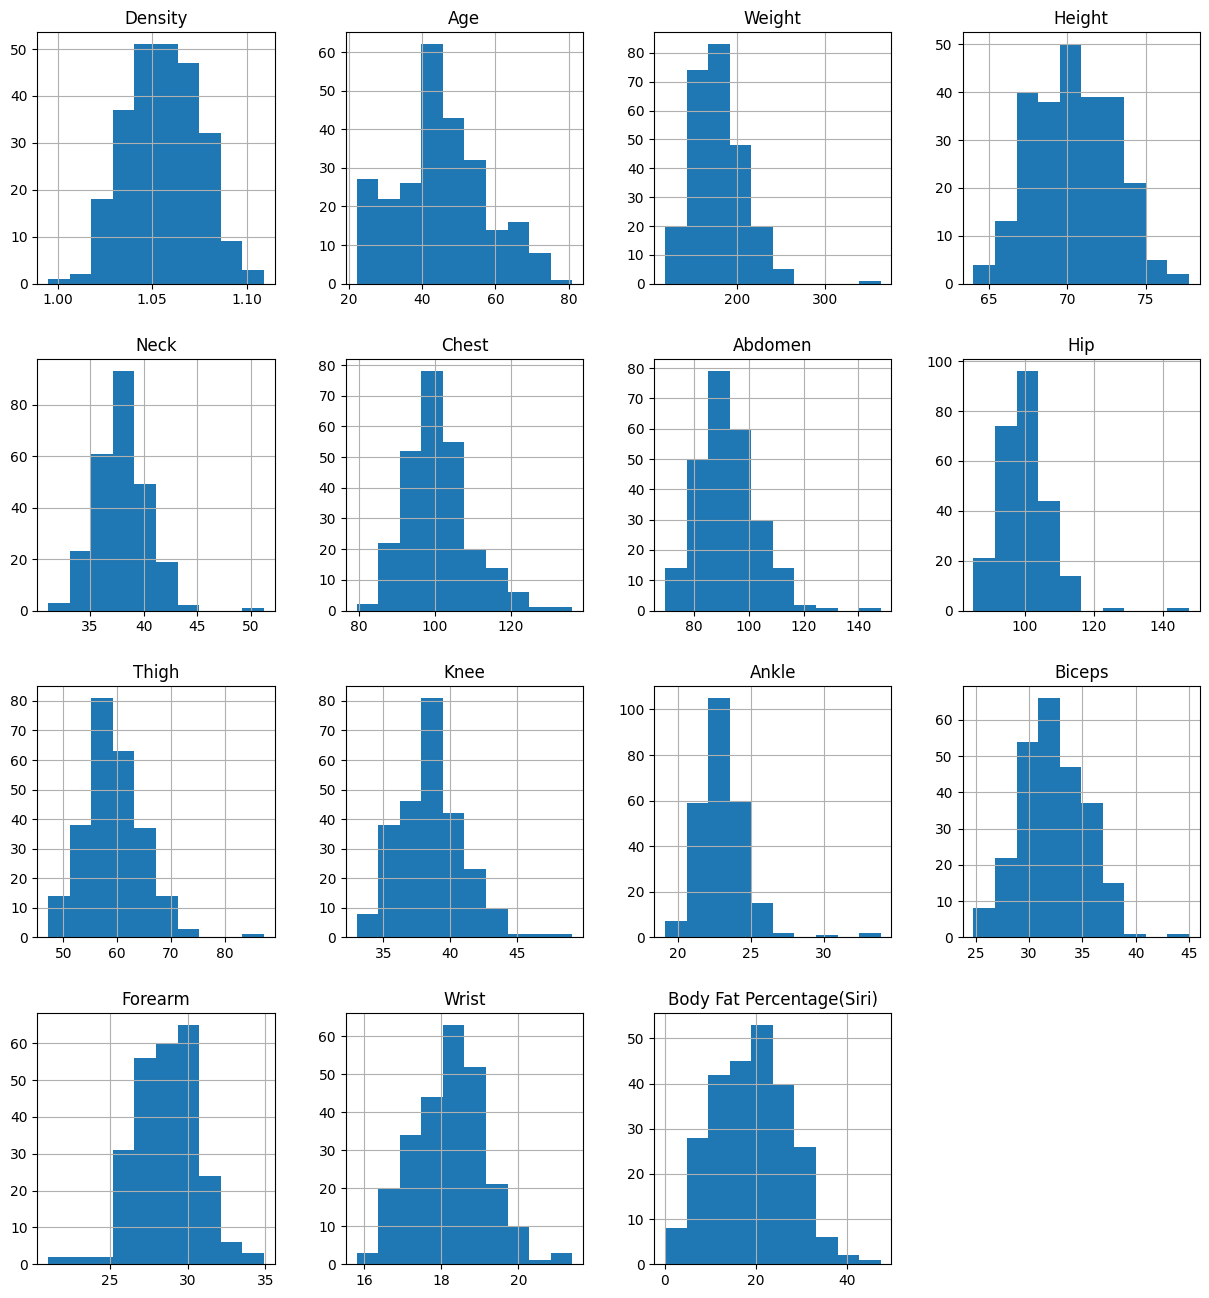

In [67]:
_ = df.hist(figsize=(15, 16))

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df = df.rename(columns={'target': 'Body Fat Percentage(Siri)'})

In [41]:
print(f'-------Column Skewness------\n{df.skew(axis=0).sort_values()}')

-------Column Skewness------
Height                      -5.384987
Forearm                     -0.219333
Density                     -0.020176
Body Fat Percentage(Siri)    0.146353
Wrist                        0.281614
Age                          0.283521
Biceps                       0.285530
Knee                         0.516744
Neck                         0.552620
Chest                        0.681556
Thigh                        0.821210
Abdomen                      0.838418
Weight                       1.205263
Hip                          1.497127
Ankle                        2.255135
dtype: float64


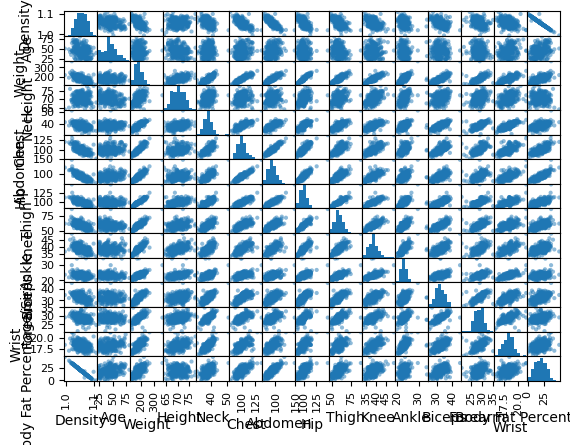

In [ ]:
#_ = pd.plotting.scatter_matrix(df)

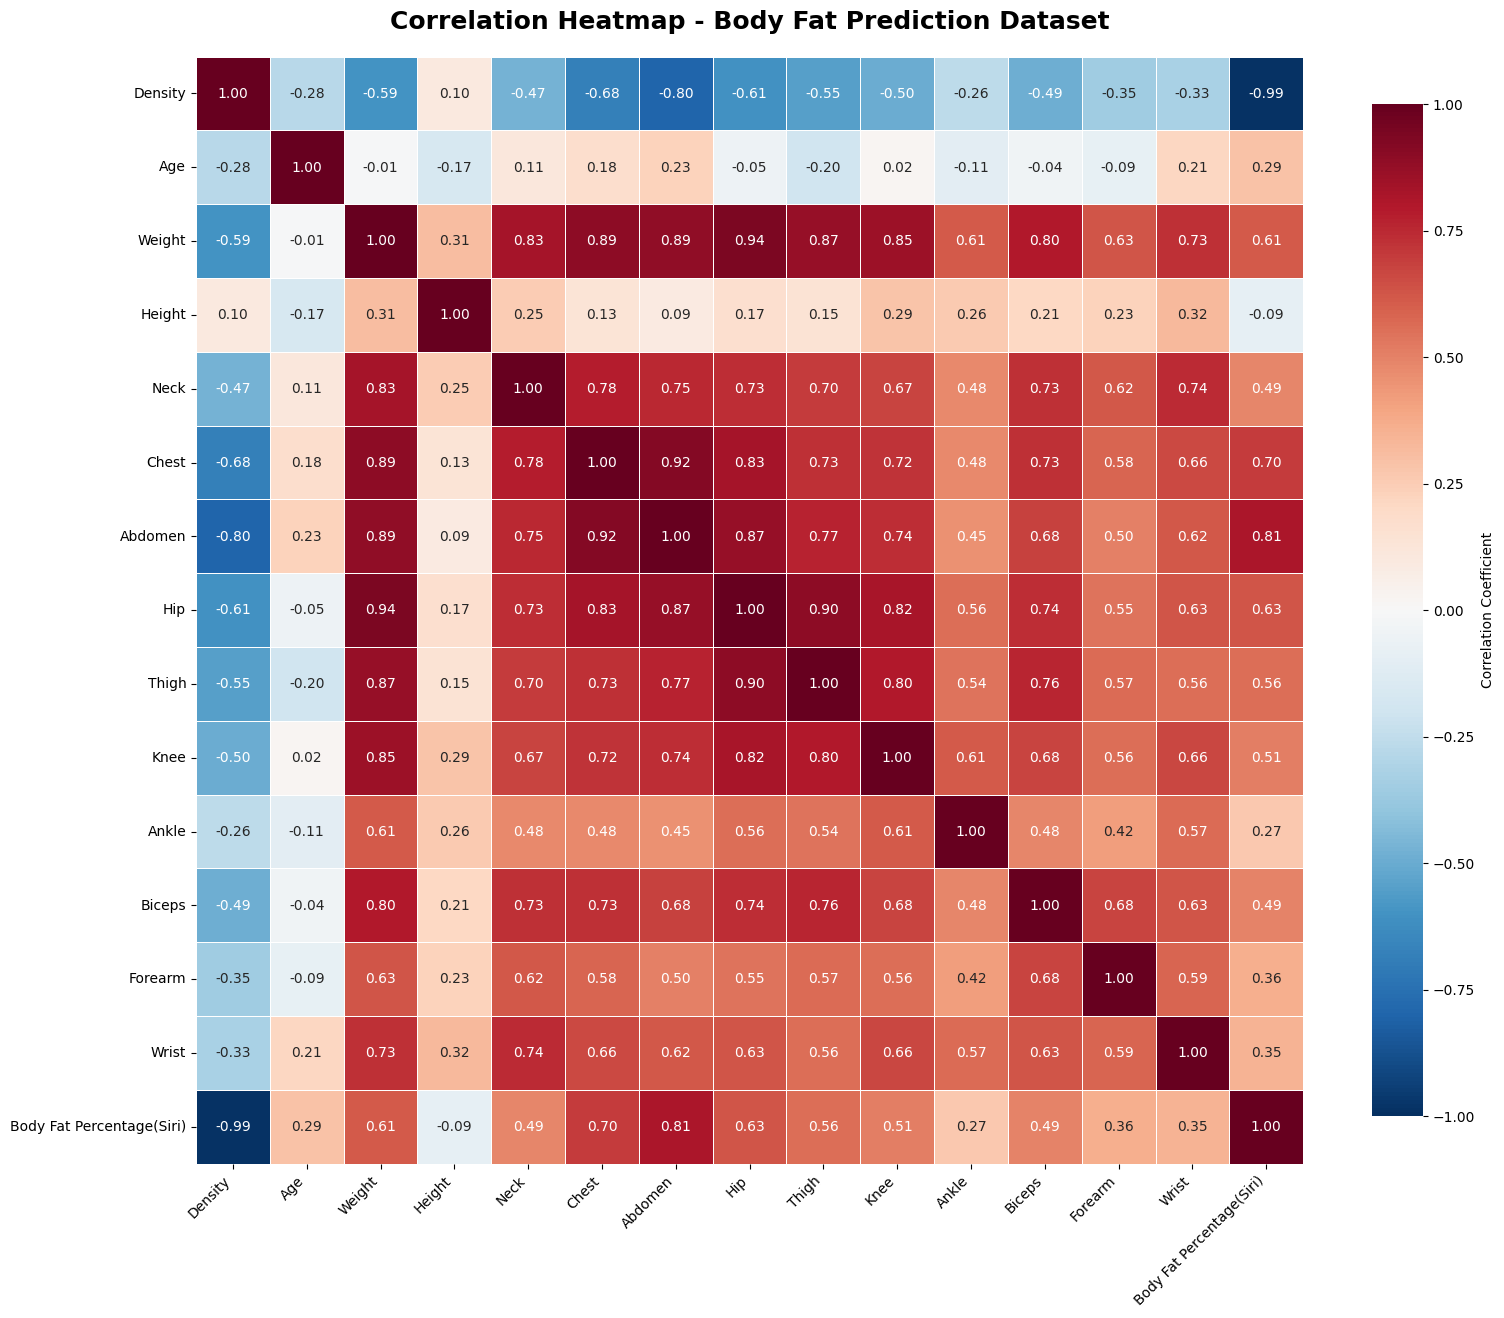

In [42]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(16, 14))

# Heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r', 
            center=0, 
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            vmin=-1, 
            vmax=1,
            ax=ax)

plt.title('Correlation Heatmap - Body Fat Prediction Dataset', 
          fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()

In [43]:
print("OUTLIER DETECTION (IQR Method)")
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers detected")

OUTLIER DETECTION (IQR Method)
Density: 1 outliers detected
Weight: 2 outliers detected
Height: 1 outliers detected
Neck: 3 outliers detected
Chest: 2 outliers detected
Abdomen: 3 outliers detected
Hip: 3 outliers detected
Thigh: 4 outliers detected
Knee: 3 outliers detected
Ankle: 3 outliers detected
Biceps: 1 outliers detected
Forearm: 5 outliers detected
Wrist: 4 outliers detected
Body Fat Percentage(Siri): 1 outliers detected


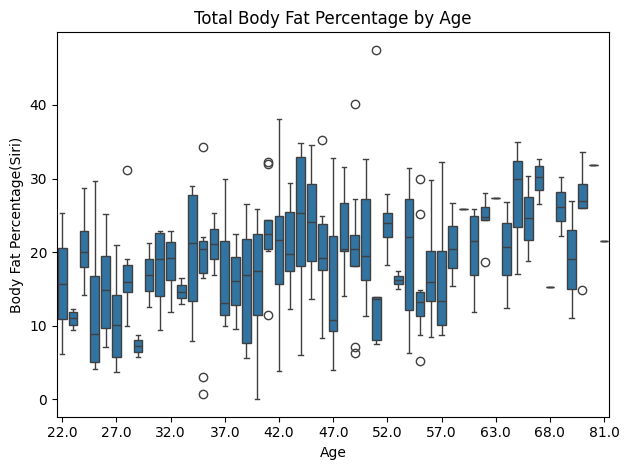

<Figure size 200000x400 with 0 Axes>

In [44]:
ax = sns.boxplot(x="Age", y="Body Fat Percentage(Siri)", data=df)
plt.title("Total Body Fat Percentage by Age")
plt.tight_layout() 
plt.figure(figsize=(2000, 4))
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]) 
plt.show()

You can see the outliers a bit better here. 

1. Clean and preparing the data
    <br>a. There appear to be 252 values in each column which means that there are no missing values. There are no duplicate values either!
2. Explore data characteristics
    <br>b. All the values are floating-point numbers. Median age: 42 yrs, Median weight: 176.5 pounds, Median height: 70 in (5 ft 10 in). The dataset has some outliers and some of the columns such as Height are quite skewed. 

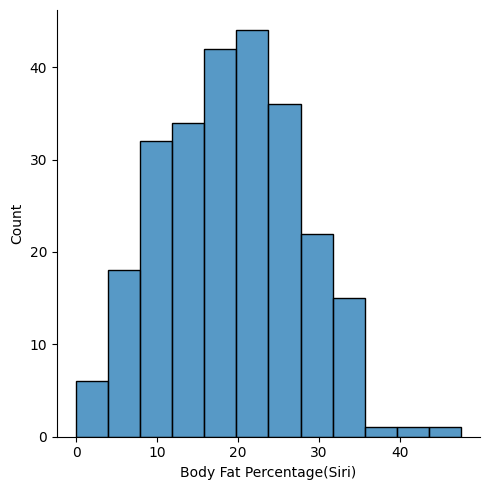

In [45]:
import seaborn as sns
df = df.rename(columns={'target': 'Body Fat Percentage(Siri)'})
                                
sns.displot(data=df, x="Body Fat Percentage(Siri)")
plt.show()

In [46]:
df.loc[df['Body Fat Percentage(Siri)']< 5]

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Body Fat Percentage(Siri)
8,1.0900,25.0,191.00,74.00,38.099998,100.900002,82.500000,99.900002,62.900002,38.299999,23.799999,35.900002,31.100000,18.200001,4.1
25,1.0911,27.0,159.25,71.50,35.700001,89.599998,79.699997,96.500000,55.000000,36.700001,22.500000,29.900000,28.200001,17.700001,3.7
28,1.0910,27.0,133.25,64.75,36.400002,93.500000,73.900002,88.500000,50.099998,34.500000,21.299999,30.500000,27.900000,17.200001,3.7
49,1.0903,47.0,127.50,66.75,34.000000,83.400002,70.400002,87.199997,50.599998,34.400002,21.900000,26.799999,25.799999,16.799999,4.0
54,1.0906,42.0,136.25,67.50,37.799999,87.599998,77.599998,88.599998,51.900002,34.900002,22.500000,27.700001,27.500000,18.500000,3.9
170,1.0926,35.0,152.25,67.75,37.000000,92.199997,81.900002,92.800003,54.700001,36.200001,22.100000,30.400000,27.400000,17.700001,3.0
171,1.0983,35.0,125.75,65.50,34.000000,90.800003,75.000000,89.199997,50.000000,34.799999,22.000000,24.799999,25.900000,16.900000,0.7
181,1.1089,40.0,118.50,68.00,33.799999,79.300003,69.400002,85.000000,47.200001,33.500000,20.200001,27.700001,24.600000,16.500000,0.0


Utilized a histogram to appropriately display the frequency distribution of the body fat percentages across our dataset of 252 men. 

<Axes: xlabel='Height'>

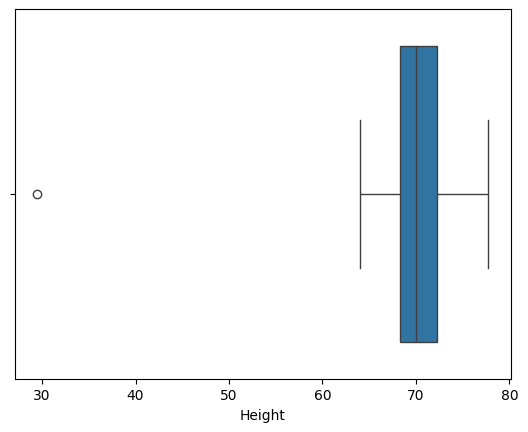

In [47]:
sns.boxplot(x=df["Height"])

The boxplot for height is an interesting visualization since it depicts a very clear outlier at around 30 inches (2 ft 6 inches) giving us a very short man which is likely the result of data entry error. An adult male that is 2.5 ft tall is biologically implausible especially given that their recorded weight is 205 pounds! The height ratio simply doesn't match their body measurements ratio at all!

In [48]:
short = df.loc[df['Height']< 30]
print(short)

df = df[df['Height'] > 30]

    Density   Age  Weight  Height       Neck  Chest     Abdomen    Hip  \
41    1.025  44.0   205.0    29.5  36.599998  106.0  104.300003  115.5   

        Thigh  Knee      Ankle     Biceps    Forearm  Wrist  \
41  70.599998  42.5  23.700001  33.599998  28.700001   17.4   

    Body Fat Percentage(Siri)  
41                  32.900002  


<Axes: xlabel='Height'>

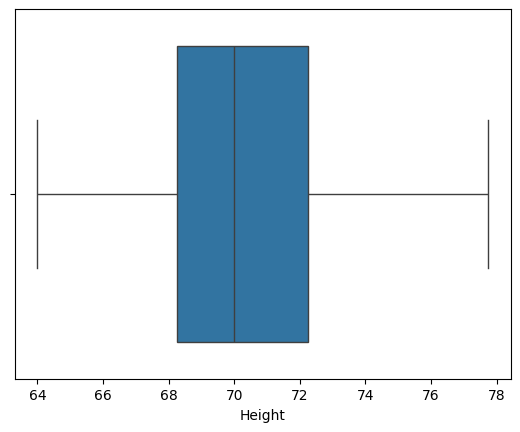

In [49]:
sns.boxplot(x=df["Height"])

We can go ahead and remove all of the men where the height is less than 30 inches (2 ft 6 inches) after determining that this is likely a data entry error so that it doesn't distort our analysis in any way. You can re-reun and code for the boxplot visualizations and see that there is no outlier anymore. 

We can use scatterplots to get an idea of the relationships present. The target variable is body fat percentage using Siri's equation. 

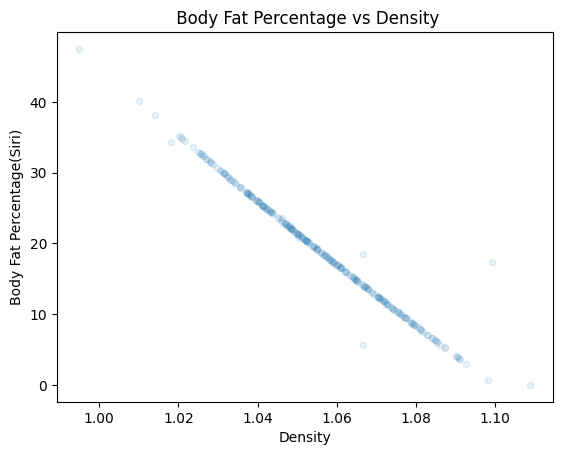

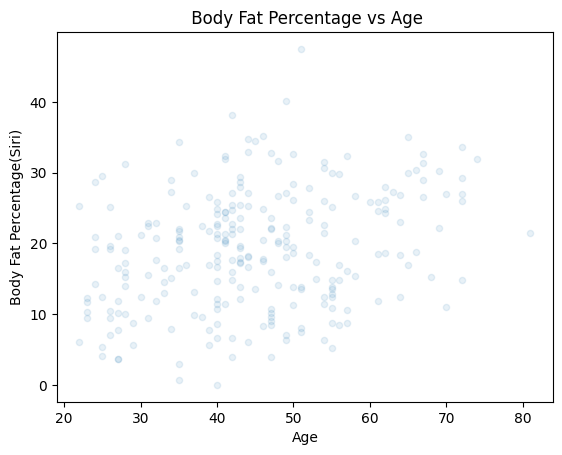

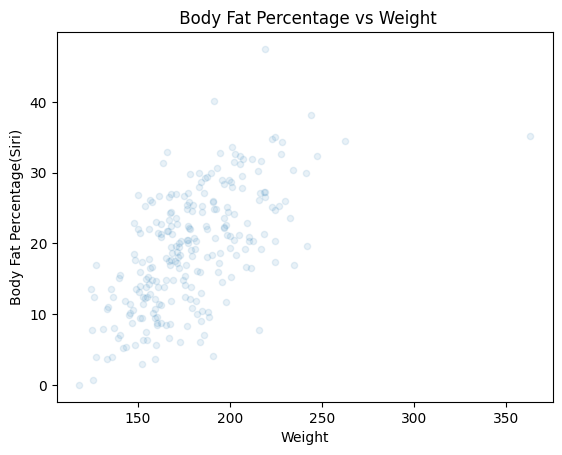

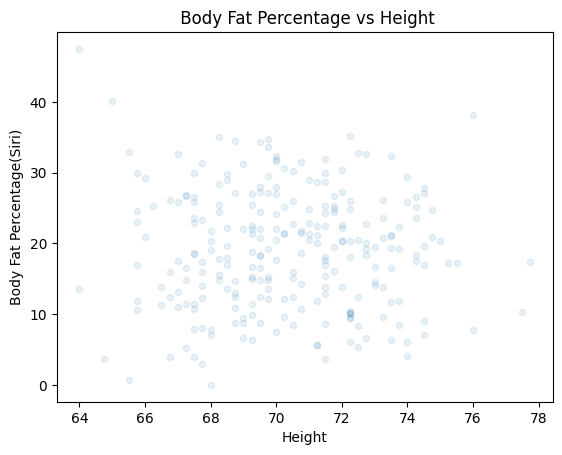

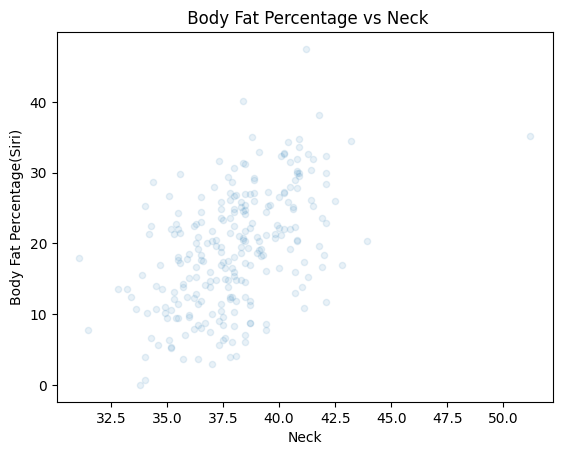

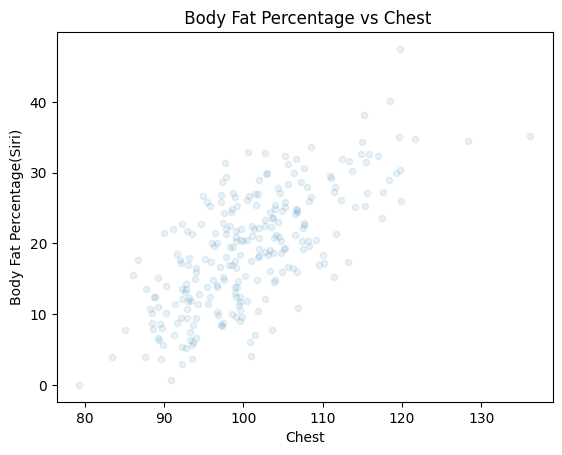

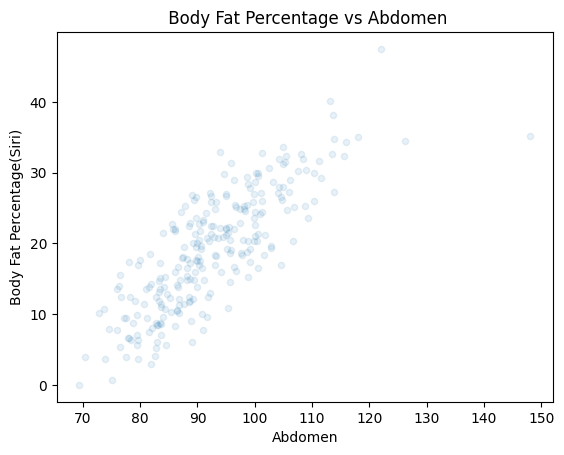

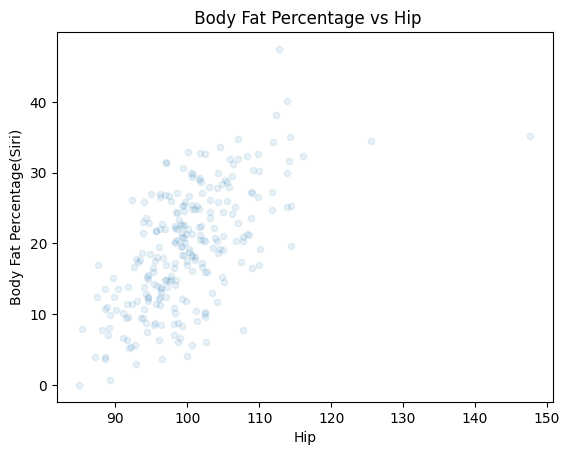

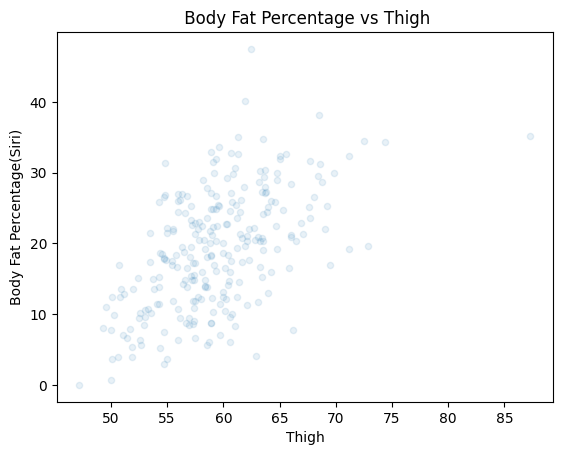

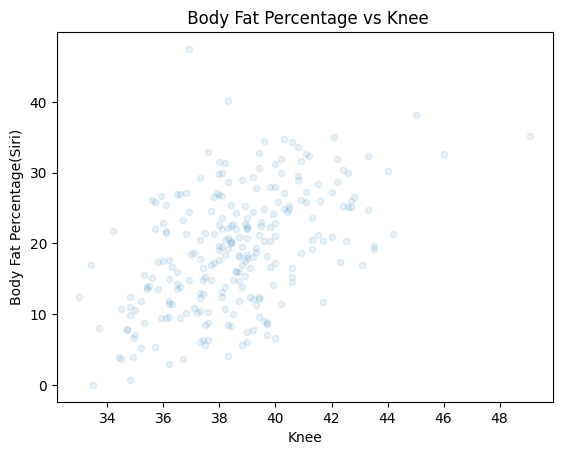

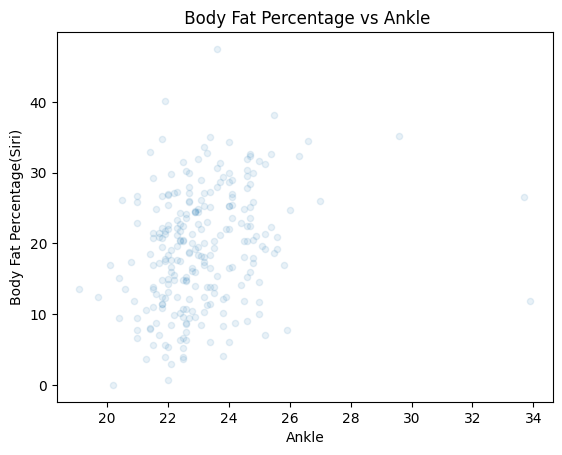

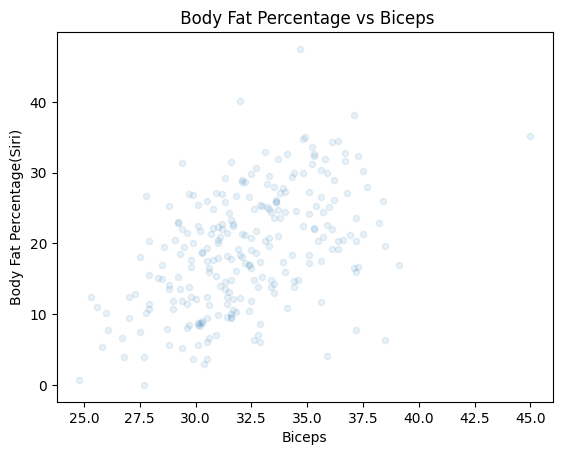

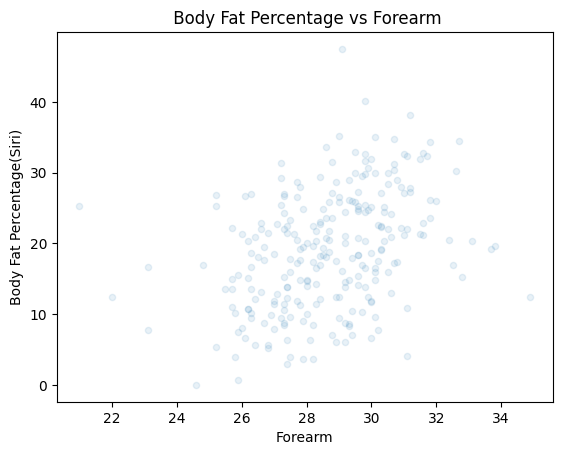

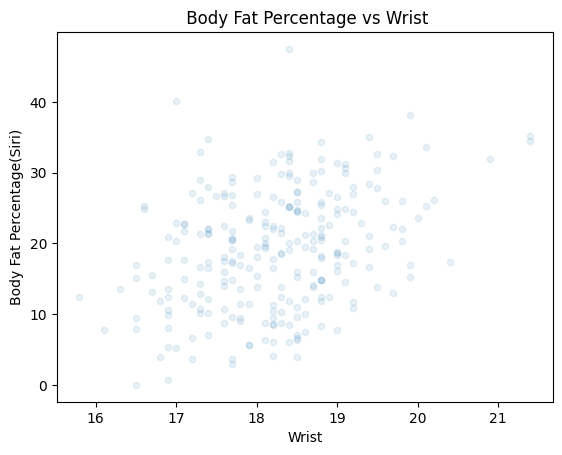

In [73]:
for c in df.columns:
    if c == "Body Fat Percentage(Siri)":
        continue

    df.plot.scatter(c, "Body Fat Percentage(Siri)", alpha=0.1)
    plt.xlabel(c)
    plt.ylabel("Body Fat Percentage(Siri)")
    plt.title(f" Body Fat Percentage vs {c}")
    plt.show()

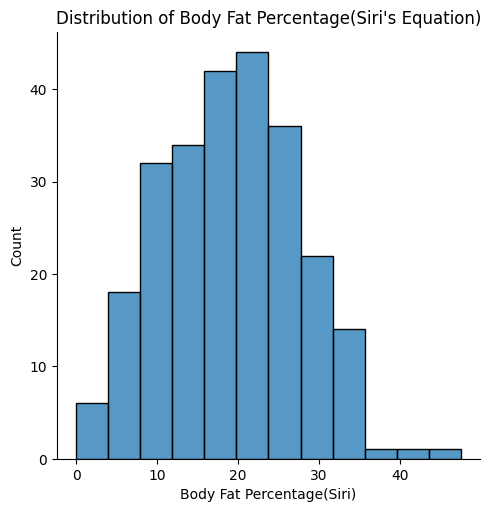

In [72]:
sns.displot(data=df, x="Body Fat Percentage(Siri)")
plt.title("Distribution of Body Fat Percentage(Siri's Equation)")
plt.show()

Visualization of interest: A body fat distributioin is a useful since it's our target variable and visualizing it shows us what we're dealing with. Since there is only 1 distinct peak you know that there are no subpopulations. The peak is around 20%. 

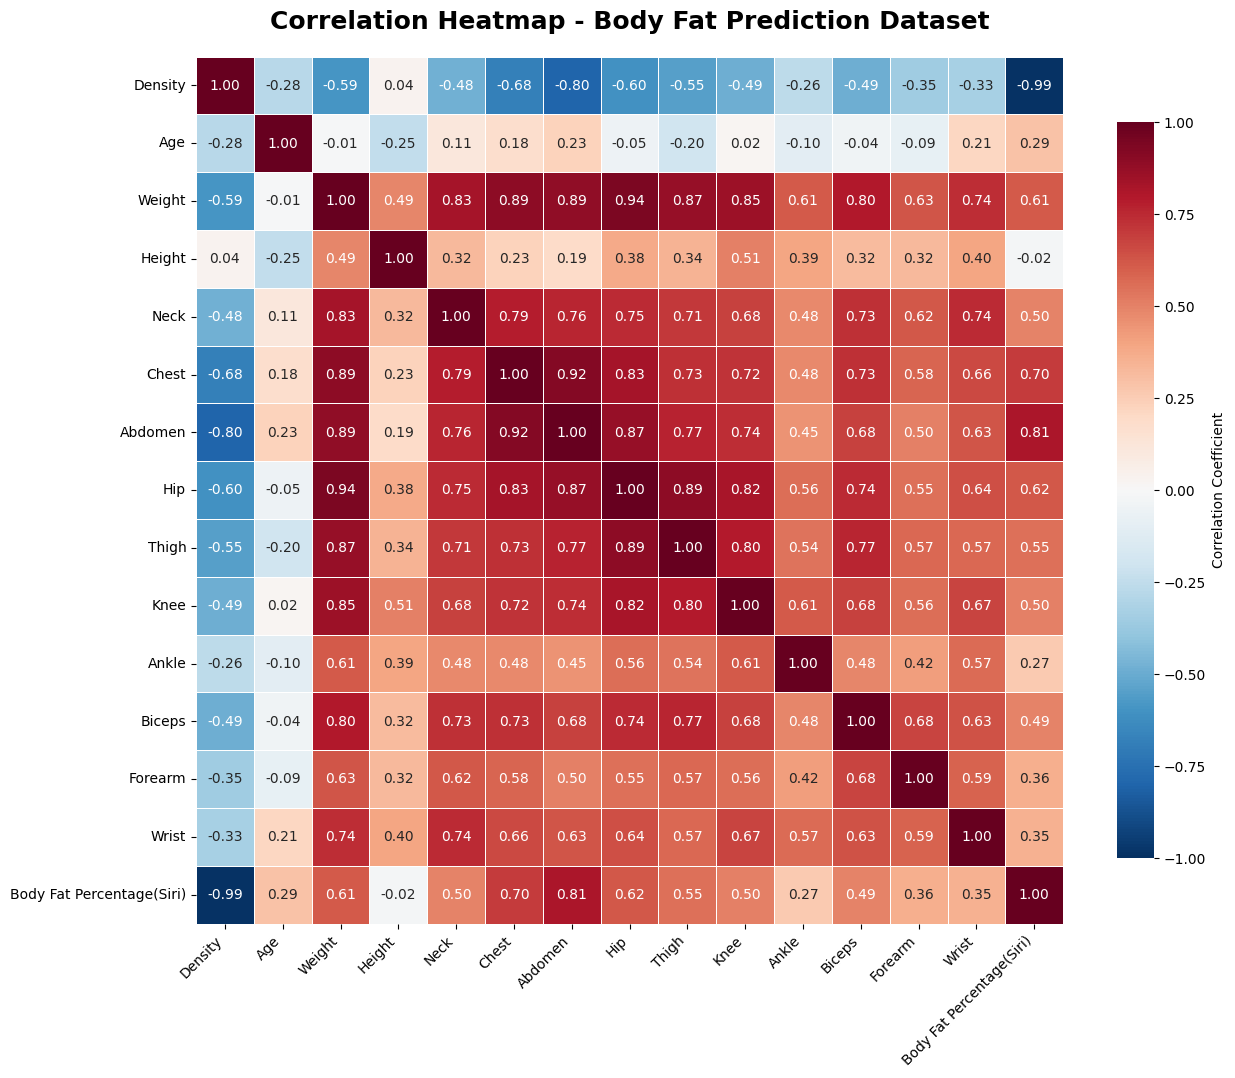

In [51]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(13, 11))

# Heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r', 
            center=0, 
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            vmin=-1, 
            vmax=1,
            ax=ax)

plt.title('Correlation Heatmap - Body Fat Prediction Dataset', 
          fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()

Visualization of interest: The heatmap reveals the interconnected nature of all of the various variables in the dataset. Many of the circumference measurements appear to be highly correlated with one another. Abodomen has the highest corrlation with body fat percentage at 0.81 suggesting that a single tape measure around the abdomen can prediect body fat percentage. 

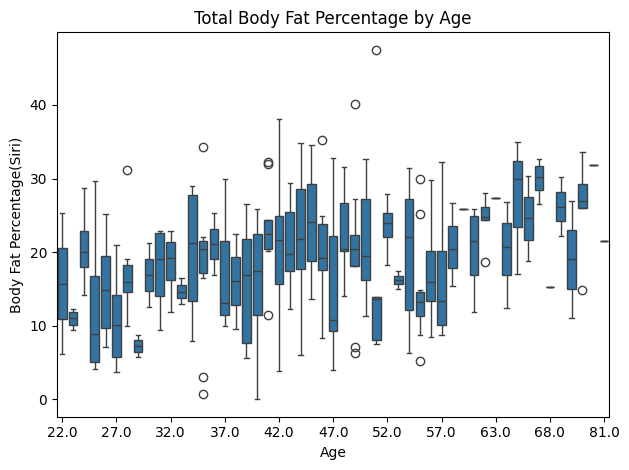

<Figure size 200000x400 with 0 Axes>

In [52]:
ax = sns.boxplot(x="Age", y="Body Fat Percentage(Siri)", data=df)
plt.title("Total Body Fat Percentage by Age")
plt.tight_layout() 
plt.figure(figsize=(2000, 4))
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]) 
plt.show()

Visualization of interest: You can see the total body fat percentage of each man based on their age. There is no apparent pattern/conclusion that we can make just from this viuslization but you can only see some outliers that are present within the data. 

In [53]:
df.columns

Index(['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist',
       'Body Fat Percentage(Siri)'],
      dtype='object')

In [ ]:
for c in df.columns:
    if c == "Body Fat Percentage(Siri)":
        continue

    df.plot.scatter(c, "Body Fat Percentage(Siri)", alpha=0.1)
    plt.xlabel(c)
    plt.ylabel("Body Fat Percentage(Siri)")
    plt.title(f" Body Fat Percentage vs {c}")
    plt.show()

Visualization of interest: You can see every relationship between every fetaure and target variable through these scatterplots. You can quickly identify which pairs have strong vs weak relationships. You can also see directionality. 

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [54]:
# YOUR CODE HERE
corr_matrix = df.corr()
corr_matrix

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Body Fat Percentage(Siri)
Density,1.000000,-0.279538,-0.592355,0.037495,-0.479440,-0.682699,-0.797971,-0.604194,-0.547194,-0.489726,-0.264056,-0.486994,-0.353362,-0.333679,-0.987655
Age,-0.279538,1.000000,-0.012517,-0.245349,0.113420,0.176757,0.231267,-0.050199,-0.201338,0.018066,-0.104986,-0.041055,-0.085051,0.213621,0.293512
Weight,-0.592355,-0.012517,1.000000,0.488850,0.834610,0.894094,0.887633,0.943617,0.870436,0.853248,0.613553,0.800427,0.631233,0.735248,0.610847
Height,0.037495,-0.245349,0.488850,1.000000,0.320704,0.227804,0.191606,0.378476,0.344408,0.505265,0.393741,0.319235,0.322111,0.397384,-0.023384
Neck,-0.479440,0.113420,0.834610,0.320704,1.000000,0.787351,0.758871,0.747549,0.707504,0.680145,0.479133,0.732915,0.624111,0.744455,0.497372
Chest,-0.682699,0.176757,0.894094,0.227804,0.787351,1.000000,0.916018,0.832625,0.731854,0.719849,0.482606,0.727658,0.580567,0.663894,0.702918
Abdomen,-0.797971,0.231267,0.887633,0.191606,0.758871,0.916018,1.000000,0.874973,0.766136,0.735732,0.452875,0.684960,0.504437,0.626179,0.812593
Hip,-0.604194,-0.050199,0.943617,0.378476,0.747549,0.832625,0.874973,1.000000,0.894454,0.821468,0.560795,0.742807,0.550097,0.644981,0.620125
Thigh,-0.547194,-0.201338,0.870436,0.344408,0.707504,0.731854,0.766136,0.894454,1.000000,0.796783,0.541873,0.765013,0.571914,0.572390,0.553622
Knee,-0.489726,0.018066,0.853248,0.505265,0.680145,0.719849,0.735732,0.821468,0.796783,1.000000,0.612702,0.679704,0.558727,0.674888,0.503375


The pair of columns that are the most correlated to each other are "Density" and "Body Fat Percentage (Siri)". The have a significant negative correlation value of -0.9876547191363315. This correlation exists because the body fat percentage is calculated from the density in Siri's equation. Therefore, this isn't a try independent relationship. We can try excluding it give us a most meaningful answer. 

Now, hip and weight circumference are the pair with the highest correlation in the dataset at 0.943617. 

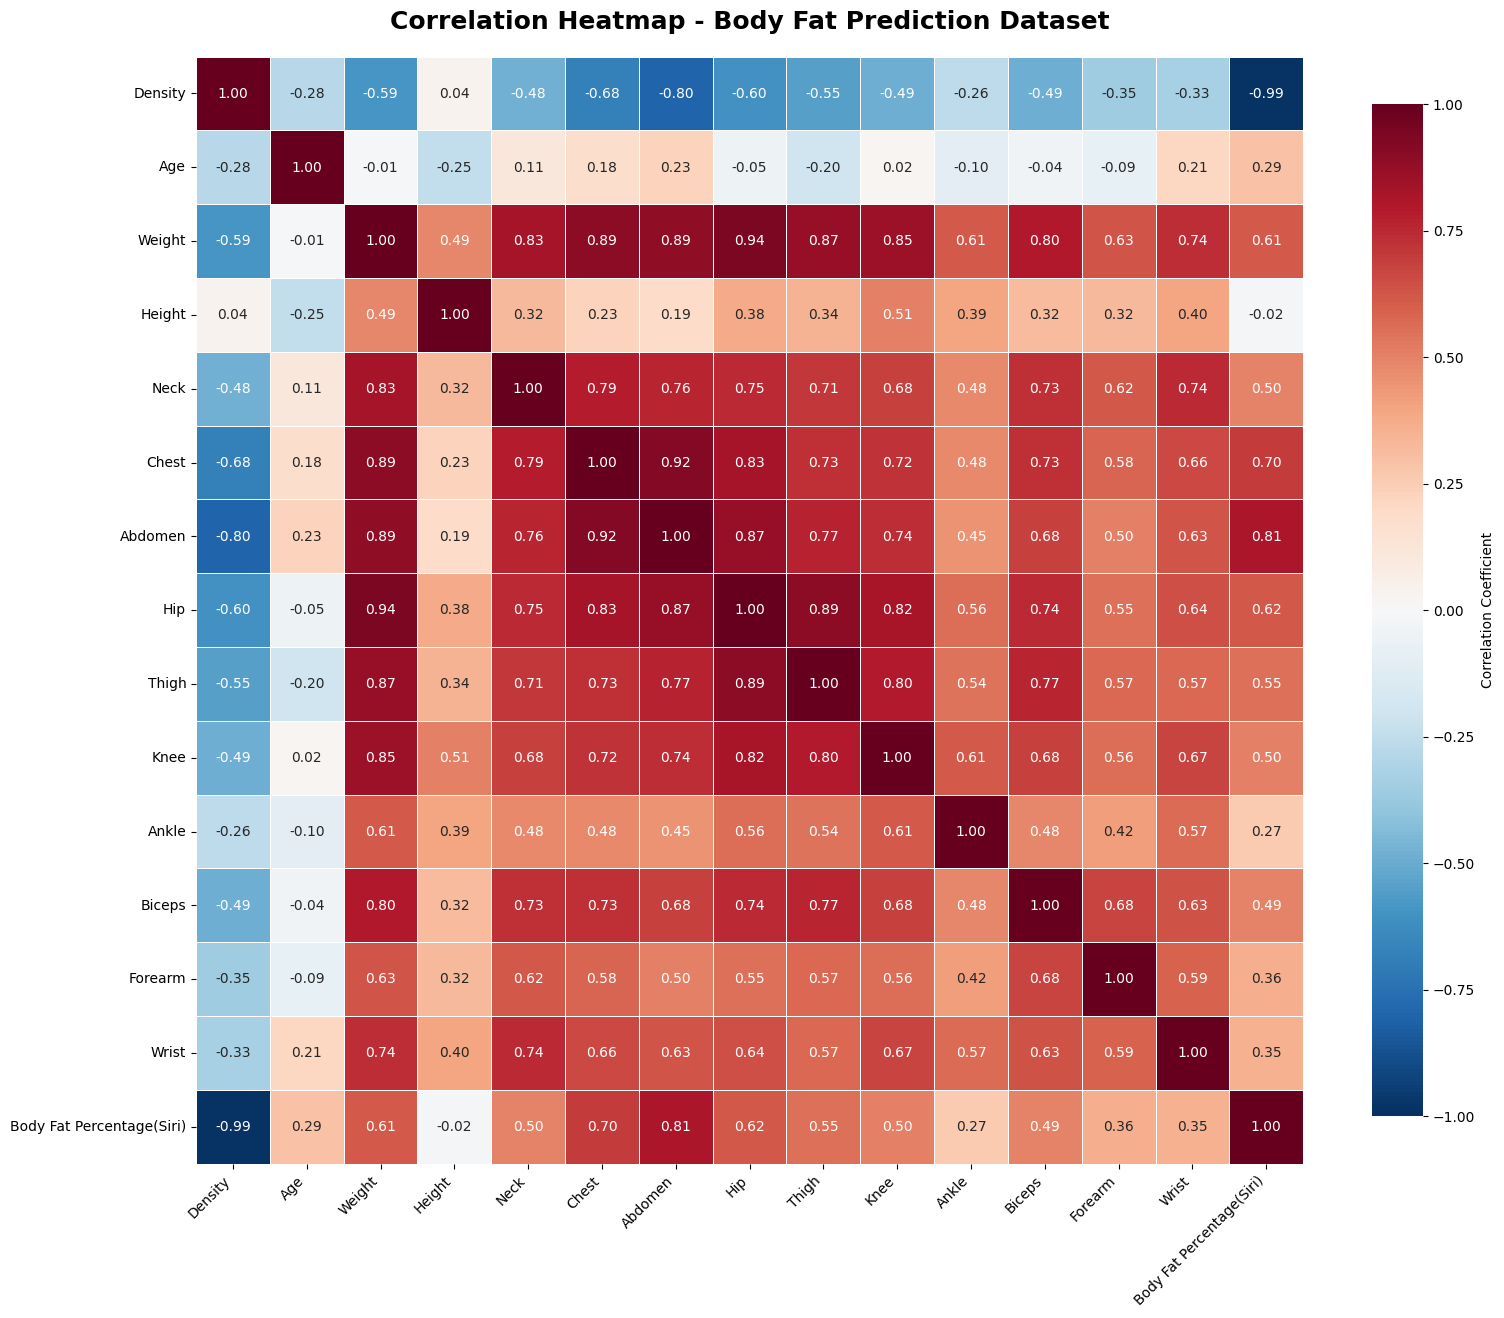

In [63]:
# correlation matrix
corr_matrix = df.corr()

corr_no_diag = corr_matrix.copy()
np.fill_diagonal(corr_no_diag.values, np.nan)

max_corr = corr_no_diag.max().max()
max_loc = corr_no_diag.stack().idxmax()

corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.iloc[i, j]
        corr_pairs.append((col1, col2, corr_val))

# sort by absolute correlation value
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# figure
fig, ax = plt.subplots(figsize=(16, 14))

# heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r', 
            center=0, 
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            vmin=-1, 
            vmax=1,
            ax=ax)


# Customize
plt.title('Correlation Heatmap - Body Fat Prediction Dataset', 
          fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()

Now, hip and weight circumference are the pair with the highest correlation in the dataset at 0.943617. 

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

1. Linear Regression (sklearn.linear_model.LinearRegression)
> Documentation link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
<br> How the model works: https://www.geeksforgeeks.org/machine-learning/python-linear-regression-using-sklearn/

2. Random Forest Regressor (sklearn.ensemble.RandomForestRegressor)
> Documentation link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
<br> How the model works: https://medium.com/@prathik.codes/mastering-randomforestregressor-in-scikit-learn-a-practical-guide-ba8615097100, https://www.geeksforgeeks.org/machine-learning/random-forest-regression-in-python/

3. Ridge Regression (sklearn.linear_model.Ridge)
> Documentation link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
<br> How the model works: https://www.geeksforgeeks.org/machine-learning/ml-ridge-regressor-using-sklearn/, https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression


### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [56]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold


X = df.drop('Body Fat Percentage(Siri)', axis=1)
y = df['Body Fat Percentage(Siri)']


# Model 1: Linear Regression 
model1 = LinearRegression()
model1.fit(X, y)
y_pred1 = model1.predict(X)


In [57]:
# Model 2: Ridge Regression 
model2 = Ridge(alpha=10)
model2.fit(X, y)
y_pred2 = model2.predict(X)


In [58]:
# Model 3: Random Forest Regressor
model3 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model3.fit(X, y)
y_pred3 = model3.predict(X)


In [59]:
models_info = [
    ("Linear Regression", y_pred1),
    ("Ridge Regression", y_pred2),
    ("Random Forest", y_pred3)
]

print(f"\n{'Model':<35} {'L2 Loss (MSE)':<18} {'L1 Loss (MAE)':<18}")

for model_name, y_pred in models_info:
    l2_loss = mean_squared_error(y, y_pred)
    l1_loss = mean_absolute_error(y, y_pred)
    print(f"{model_name:<35} {l2_loss:<18.4f} {l1_loss:<18.4f} ")


Model                               L2 Loss (MSE)      L1 Loss (MAE)     
Linear Regression                   1.5324             0.4833             
Ridge Regression                    17.5088            3.4420             
Random Forest                       0.3023             0.1494             


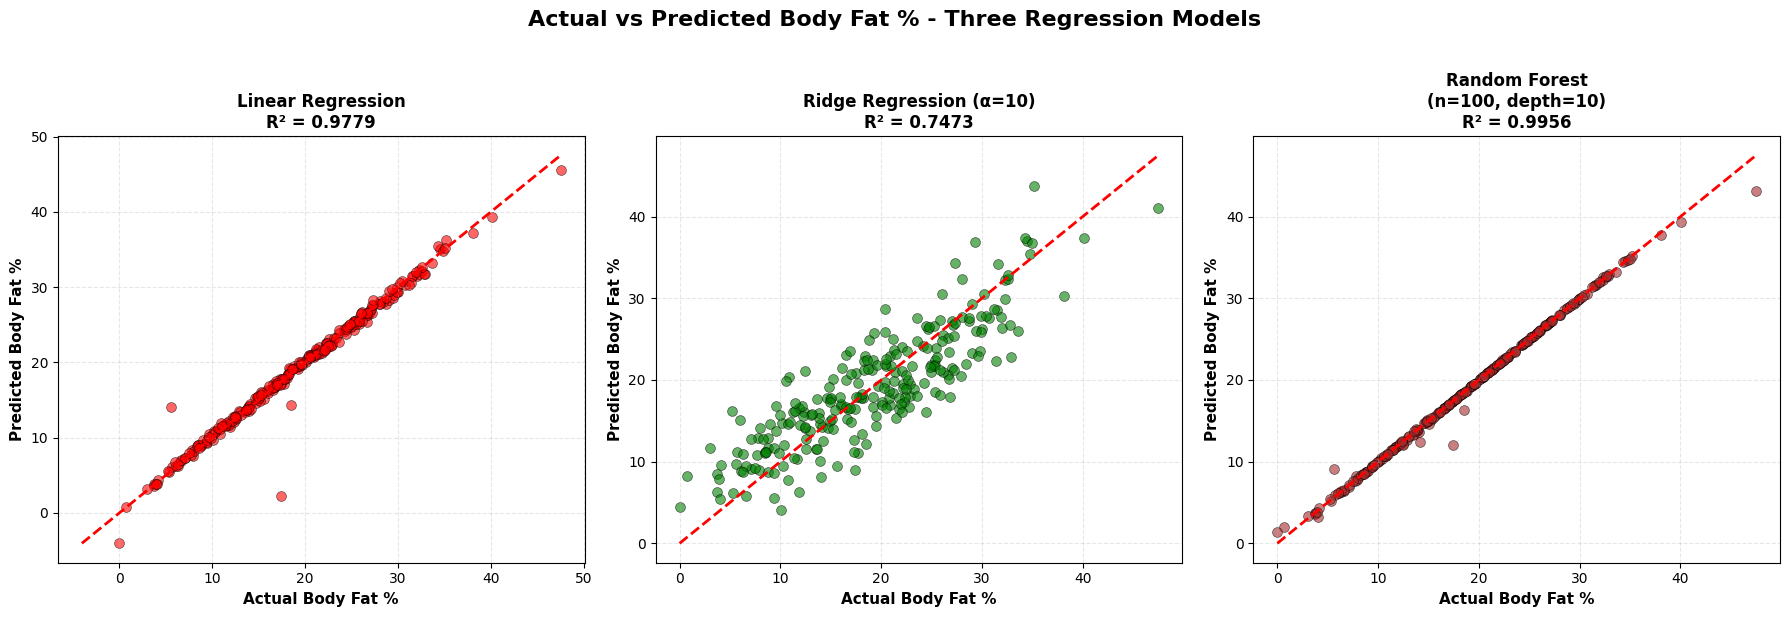

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = ['red', 'green', 'brown']
models_data = [
    ("Linear Regression", y_pred1, colors[0]),
    ("Ridge Regression (α=10)", y_pred2, colors[1]),
    ("Random Forest\n(n=100, depth=10)", y_pred3, colors[2])
]

for idx, (ax, (model_name, y_pred, color)) in enumerate(zip(axes, models_data)):
    # Scatter plot
    ax.scatter(y, y_pred, alpha=0.6, s=50, color=color, edgecolors='black', linewidth=0.5)
    
    # Perfect prediction line (y=x)
    min_val = min(y.min(), y_pred.min())
    max_val = max(y.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    # R²
    r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - y.mean())**2))
    
    # metrics for this model
    l2 = mean_squared_error(y, y_pred)
    l1 = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(l2)
    
    # Labels and title
    ax.set_xlabel('Actual Body Fat %', fontsize=11, fontweight='bold')
    ax.set_ylabel('Predicted Body Fat %', fontsize=11, fontweight='bold')
    ax.set_title(f'{model_name}\nR² = {r2:.4f}', fontsize=12, fontweight='bold')
    ax.grid(alpha=0.3, linestyle='--')
    

plt.suptitle('Actual vs Predicted Body Fat % - Three Regression Models', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

5-fold cross-validation is an ML tehcinique where the dataset is split into 5 equal folds and then trained 5 times (4 folds are used for training and 1 fold is used for testing). 

In [ ]:

X = df.drop('Body Fat Percentage(Siri)', axis=1)
y = df['Body Fat Percentage(Siri)']

# models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10),
    'Random Forest ': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
}

results = []

for model_name, model in models.items():
    
    # 1. FULL TRAINING (training on entire dataset)
    model.fit(X, y)
    y_pred_full = model.predict(X)
    l2_full_training = mean_squared_error(y, y_pred_full)
    
    
    # 2. 5-FOLD CROSS-VALIDATION
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # negative MSE because sklearn cross_val_score maximizes scores
    cv_scores = cross_val_score(model, X, y, cv=kfold, 
                                 scoring='neg_mean_squared_error')
    
    # back to positive MSE
    cv_mse_scores = -cv_scores
    l2_cv_mean = cv_mse_scores.mean()
    l2_cv_std = cv_mse_scores.std()
    
    
    # overfitting measure
    overfitting_gap = l2_cv_mean - l2_full_training
    overfitting_pct = (overfitting_gap / l2_full_training) * 100
    
    
    results.append({
        'model': model_name,
        'full_training_l2': l2_full_training,
        'cv_l2_mean': l2_cv_mean,
        'cv_l2_std': l2_cv_std,
        'overfitting_gap': overfitting_gap,
        'overfitting_pct': overfitting_pct,
        'cv_scores': cv_mse_scores
    })

# comparison table
print(f"\n{'Model':<35} {'Full Train L2':<15} {'5-Fold CV L2':<20} {'Gap':<12} {'% Increase':<12}")

for r in results:
    print(f"{r['model']:<35} {r['full_training_l2']:<15.6f} "
          f"{r['cv_l2_mean']:.6f} (±{r['cv_l2_std']:.4f})  "
          f"{r['overfitting_gap']:<12.6f} {r['overfitting_pct']:<12.2f}%")



Model                               Full Train L2   5-Fold CV L2         Gap          % Increase  
Linear Regression                   1.532403        2.025314 (±2.1839)  0.492911     32.17       %
Ridge Regression                    17.508756       20.160450 (±3.1010)  2.651694     15.14       %
Random Forest                       0.302326        2.278754 (±1.7566)  1.976428     653.74      %


### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

We must standardize the data to mean zero and standard deviation one. 

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Model 1: Linear Regression with preprocessing
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline1.fit(X, y)
y_pred1 = pipeline1.predict(X)

# Model 2: Ridge Regression with preprocessing
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=10))
])
pipeline2.fit(X, y)
y_pred2 = pipeline2.predict(X)

# Model 3: Random Forest Regressor with preprocessing
pipeline3 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
])
pipeline3.fit(X, y)
y_pred3 = pipeline3.predict(X)

# Calculate L2 losses (Mean Squared Error)
mse1 = mean_squared_error(y, y_pred1)
mse2 = mean_squared_error(y, y_pred2)
mse3 = mean_squared_error(y, y_pred3)

# Display results
print("MODEL COMPARISON - L2 LOSS (MSE)")
print(f"\n1. Linear Regression:")
print(f"   MSE (L2 Loss): {mse1:.4f}")

print(f"\n2. Ridge Regression (alpha=10):")
print(f"   MSE (L2 Loss): {mse2:.4f}")

print(f"\n3. Random Forest Regressor:")
print(f"   MSE (L2 Loss): {mse3:.4f}")


MODEL COMPARISON - L2 LOSS (MSE)

1. Linear Regression:
   MSE (L2 Loss): 1.5324

2. Ridge Regression (alpha=10):
   MSE (L2 Loss): 1.7365

3. Random Forest Regressor:
   MSE (L2 Loss): 0.3022



The difference in L2 loss for the linear regression and random forest model is not significant. However, after ensuring that each feature has a mean 0 and standard deviation of 1, the L2 loss of the ridge regression model was decreased considerably (going from 17.5088 to 1.7365). Ridge regression works by add a penalty term and pushing that weights towrds 0. Without the standardization, features have very different scales the ridge regression penalizes all coefficients equally by their magnitude. This demonstrates why standardization is critical for regularized models. 

Therefore, the most affected model was the Ridge regression. 

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

When you evaluate 1000 models and pick the best one, you're essentially overfitting to the cross-validation set itself since the CV scores are no
longer unbiased estimates of generalization performance because you've used them to make a selection decision.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

The best model in comparison to all the other models that I have built would be the Ridge regression (after standardization). This is because we have many features and strong multicoliinearlity in this model. Medical data typically has high correlation. We want to effectively reduce the impact of all features evenly so no single coefficient is dominating. 
The random forest model has a lower L2 loss but it appears to be memorizing rather than learning. Since there's only 252 samples, most of the leaves only have 1-3 samples. The relationship appears to be predominately linear so more complex models will just add noise. The linear regression is good but as previously stated, we need something that provides insurance against instability from the multicollinearity. 
The ridge regression is the best model since it has excellent excellent cross-validation performance, adds regularization for stability, and is able to handle the multicollinearity gracefully. 